# Lab 1: Project dataset EDA and working with textual data

## Project dataset EDA

In this first lab session, you will be starting on the project by exploring the TripAdvisor dataset. Before you can start implementing and training any models on the dataset you need a thorough understanding of the data, its structure and what it is capable of. Therefore, you will be exploring the dataset to understand the datatypes of the attributes, their distribution and possible correlations. In your exploration you will find that a real world dataset, such as the TripAdvisor dataset, is far from '*clean*'. This means you will need to do **data cleaning** as well as other **preprocessing** steps before you can actually use the data and learn something from it. To get you started, scikit-learn has many options helper functions and documentation available for common data transformations such as: 
* categorical data encoding (https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
* discretization (https://scikit-learn.org/stable/modules/preprocessing.html#discretization)
* handling missing data (https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values)
* standardisation (https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)
* normalisation (https://scikit-learn.org/stable/modules/preprocessing.html#normalization)
* you can even implement your own custom transformer (https://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers)

Furthermore, scikit-learn has useful features such as the ability to build an **pipeline** (https://scikit-learn.org/stable/modules/compose.html#) to chain together multiple preprocessing steps and models.

Processing textual data such as the restaurant descriptions and reviews requires some more attention. Therefore, at the end of this notebook, some techniques for working with textual data are introduced for you to experiment with.

## Task
Using the tools available and the suggested links in the introduction explore, clean, process and visualise the data. By doing so, you should have a better idea of the dataset. You can further explore some of the tasks about the data, such as:

* How does tripadvisor rank the restaurants? What category are the most correlated? 
* How is the price in tags ($) being calculated?
* Which correlation can be found between price category and the city of the restaurant?

Try to find more question you can ask yourself about the data that can give you more insights. <br>
Keep in mind that this dataset will be used for the project, try to think of the possible tasks while you go through the following steps.

### Get an initial feel of the data

First of all, take a look at your dataset. 
See what kind of data are provided in this dataset, and what kind of information is contained in the dataset.
What's the type of data? How are you going to use them?

*Hint: Pandas is a powerful tool to load and organize your data, try to load the dataset using pandas.*

In [1]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np

original_df = pd.read_csv("tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head()

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727
2,#2,Royal India Restaurant,4.5 of 5 bubbles,774 reviews,$$ - $$$|Indian|Asian|Vegetarian Friendly,"Donkersteeg 19 Near hotel novotel gent, Ghent ...",+32 497 40 78 27,NaN,NaN,True,royalindiabelgium@gmail.com,True,False,4.5,4.5,4.5,-1.0,"For fresh ingredients and bold flavour, dine i...",NaN,€15 - €30,"Indian, Asian","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night, Drinks","Takeout, Reservations, Seating, Highchairs Ava...",12188645
3,#3,Roots,5.0 of 5 bubbles,282 reviews,$$ - $$$|Belgian|European|Healthy,"Vrouwebroersstraat 5, Ghent 9000 Belgium",+32 9 310 67 73,http://www.rootsgent.be/,NaN,True,Info@rootsgent.be,True,True,5.0,4.5,5.0,-1.0,NaN,NaN,€40 - €80,"Belgian, European, Healthy",NaN,"Lunch, Dinner","Reservations, Outdoor Seating, Seating, Serves...",9710340
4,#1,Mirage,4.5 of 5 bubbles,240 reviews,$$ - $$$|French|Belgian|Dutch,"Brusselsestraat 99, Dendermonde 9200 Belgium",+32 52 55 48 26,http://mirage-ma.be/,http://mirage-ma.be/feestdagenmenus/,True,contact@mirage-ma.be,True,False,4.5,4.5,4.5,-1.0,NaN,NaN,€16 - €64,"French, Belgian, Dutch, Seafood, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Accepts Visa, Reservations, Outdoor Seating, S...",8298124


As you can see, there are different types of data, numeric, bool, textual. <br>
Some columns contain multiply information. (e.g. tags contains price and cuisine style)
Some columns share the same information with other columns. (tags, cuisine style, and special diets or tags and price range) <br>
It is important to clean then up before you further process and analysis the data.

### Spliting the data
As explained in the introduction, the goal of machine learning is to build models on train data that are able to make predictions on unseen test data. So we first try to split our data into a trainset and a test set before we move on to the other steps.

In [2]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df, test_size=0.2, shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1119 to 1525
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1888 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1900 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1900 non-null   object 
 7   website url          1744 non-null   object 
 8   menu url             720 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1082 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

### Clean the data

Let's first deal with the numeric data.

*Hint 1: You can check data type with pandas easily.*

In [3]:
# decide which data should be numeric
# niet droppen! lege data levert ook bijwaarde op!
# df_train = df_train.dropna()
df_train['rank'] = df_train['rank'].str.replace("#","")
df_train['general rating'] = df_train['general rating'].str.split(' ').str[0]
df_train['number of reviews'] = df_train['number of reviews'].str.split(' ').str[0].str.replace(',','')

# werk niet 
# df_train['price range'] = df_train['price range'].str.replace("€","").str.replace('No pricing available','')
# df_train[['min','max']] = df_train['price range'].str.split("-",expand=True,)

df_train["price range"] = df_train["price range"].map(lambda x: str(x).replace("No pricing available", "").replace("€", "").replace(" ", ""))
df_train["price range"] = df_train["price range"].map(lambda x: "nan-nan" if(str(x) == "") else x)

df_train[["price range min", "price range max"]] = df_train["price range"].str.split("-", expand=True)


df_train = df_train.astype({"rank": "float32", "general rating": "float32", "number of reviews": "float32", "price range min": "float32", "price range max": "float32"})


# df_train['restaurant_name'] = df_train['restaurant_name'
print("-"*20, "Dataset:", "-"*20)
print(df_train.info(), "\n")
# e.g. rank, general rating, number of reviews, food rating, service rating, value rating, atmosphere rating, price range
df_train

-------------------- Dataset: --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1119 to 1525
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1888 non-null   float32
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   float32
 3   number of reviews    2064 non-null   float32
 4   tags                 1900 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1900 non-null   object 
 7   website url          1744 non-null   object 
 8   menu url             720 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1082 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id,price range min,price range max
1119,2.0,Hof Ter Polder,4.0,17.0,$$ - $$$|French|Belgian|European,"Plezantstraat 4, Sint-Gillis-Waas 9170 Belgium",+32 470 66 05 54,NaN,NaN,True,Hof.ter.polder@telenet.be,False,False,-1.0,-1.0,-1.0,-1.0,NaN,Mijn restaurant biedt een (h)eerlijke keuken a...,12-32,"French, Belgian, European",NaN,"Lunch, Dinner, Drinks","Reservations, Seating, Table Service, Takeout,...",17473675,12.0,32.0
277,2.0,Bistro Laan Ya Mo,4.5,69.0,$$ - $$$|Asian|Thai|Vegetarian Friendly,"Burgemeester Firmin De Meyerstraat 2, Zottegem...",+32 496 44 85 44,http://www.laanyamo.be/,https://laanyamo.be/eet-drinkkaart/,True,King@laanyamo.be,False,False,4.5,4.0,4.0,-1.0,NaN,NaN,nan-nan,"Asian, Thai","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Outdoor Seating, Seatin...",7233853,NaN,NaN
2025,29.0,Meatpoint Hamme,4.0,1.0,Steakhouse|Barbecue|Grill,"Veldstraat 52, Hamme 9220 Belgium",NaN,NaN,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,nan-nan,"Steakhouse, Barbecue, Grill",NaN,NaN,NaN,23777561,NaN,NaN
1267,477.0,Tuana Restaurant,4.0,21.0,$$ - $$$|Italian|French|Belgian,"Elfnovemberstraat 10, Ghent 9030 Belgium",+32 9 398 33 66,http://www.tuana.gent/,http://www.tuana.gent/#menu,False,info@tuana.gent,False,False,4.0,4.0,3.5,-1.0,NaN,NaN,4-25,"Italian, French, Belgian, European, Turkish",Vegetarian Friendly,"Lunch, Dinner","Reservations, Wheelchair Accessible, Table Ser...",10539654,4.0,25.0
573,2.0,Libertine,4.5,22.0,$$ - $$$|Belgian|Seafood|International,"Oudenaardsesteenweg 32, Erpe-Mere 9420 Belgium",+32 53 41 02 68,http://www.restaurantlibertine.be/,https://restaurantlibertine.be/menu/,True,NaN,False,True,5.0,4.5,4.5,-1.0,NaN,NaN,nan-nan,"Belgian, Seafood, International, European, Con...",NaN,"Lunch, Dinner","Reservations, Table Service, Seating",19323310,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,662.0,inSPEKteur,5.0,1.0,NaN,"Drongensesteenweg 160, Ghent 9000 Belgium",+32 477 98 95 34,NaN,NaN,True,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,nan-nan,NaN,NaN,Dinner,NaN,12233182,NaN,NaN
1531,2.0,Restaurant Regina,3.5,19.0,$$ - $$$|Belgian,"Donklaan 134, Overmere, Berlare 9290 Belgium",+32 9 367 55 71,NaN,NaN,False,NaN,False,False,3.0,3.5,3.5,-1.0,NaN,NaN,nan-nan,Belgian,NaN,Dinner,"Reservations, Seating, Wheelchair Accessible, ...",10631925,NaN,NaN
1428,22.0,Maboel in 't Gildenhuis,5.0,3.0,$$ - $$$|Belgian|European|Asian,"Laurens De Metsstraat 21, Zottegem 9620 Belgium",+32 474 57 88 91,https://www.facebook.com/Maboel.Zottegem/,NaN,True,wannes.lamon@gmail.com,False,False,-1.0,-1.0,-1.0,-1.0,"Een vleugje romantiek, een kletske rock and ro...",NaN,15-22,"Belgian, European, Asian, Pub, Fusion",NaN,"Lunch, Dinner, Drinks","Takeout, Reservations, Outdoor Seating, Privat...",22981952,15.0,22.0
117,70.0,Eetkaffee Multatuli,4.0,267.0,$$ - $$$|Belgian|Vegetarian Friendly|Vegan Opt...,"Huidevetterskaai 40, Ghent 9000 Belgium",+32 9 223 07 11,http://www.eetkaffee-multatuli.be/,https://multatuli.gent/menu/,True,info@eetkaffee-multatuli.be,False,False,4.0,4.0,4.0,4.0,NaN,NaN,nan-nan,Belgian,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night","Reservations, Outdoor Seating, Seating, Highch...",1537371,NaN,NaN


As it can be seen, the pandas' dataframe also stores the datatype of each columns. <br>
You can easily filter the data based on datatype.

In [4]:
# filter the data based on data types
numerics = ['float32','int', 'float']
df = df_train.select_dtypes(include=numerics)
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1119 to 1525
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               1888 non-null   float32
 1   general rating     2064 non-null   float32
 2   number of reviews  2064 non-null   float32
 3   food rating        2064 non-null   float64
 4   service rating     2064 non-null   float64
 5   value rating       2064 non-null   float64
 6   atmosphere rating  2064 non-null   float64
 7   id                 2064 non-null   int64  
 8   price range min    540 non-null    float32
 9   price range max    540 non-null    float32
dtypes: float32(5), float64(4), int64(1)
memory usage: 137.1 KB
None 



Now, you have a subset that contains columns with numeric data, take a look at the dataset by plotting the scatter plot and histogram.

array([[<AxesSubplot:xlabel='rank', ylabel='rank'>,
        <AxesSubplot:xlabel='general rating', ylabel='rank'>,
        <AxesSubplot:xlabel='number of reviews', ylabel='rank'>,
        <AxesSubplot:xlabel='food rating', ylabel='rank'>,
        <AxesSubplot:xlabel='service rating', ylabel='rank'>,
        <AxesSubplot:xlabel='value rating', ylabel='rank'>,
        <AxesSubplot:xlabel='atmosphere rating', ylabel='rank'>,
        <AxesSubplot:xlabel='id', ylabel='rank'>,
        <AxesSubplot:xlabel='price range min', ylabel='rank'>,
        <AxesSubplot:xlabel='price range max', ylabel='rank'>],
       [<AxesSubplot:xlabel='rank', ylabel='general rating'>,
        <AxesSubplot:xlabel='general rating', ylabel='general rating'>,
        <AxesSubplot:xlabel='number of reviews', ylabel='general rating'>,
        <AxesSubplot:xlabel='food rating', ylabel='general rating'>,
        <AxesSubplot:xlabel='service rating', ylabel='general rating'>,
        <AxesSubplot:xlabel='value rating', ylab

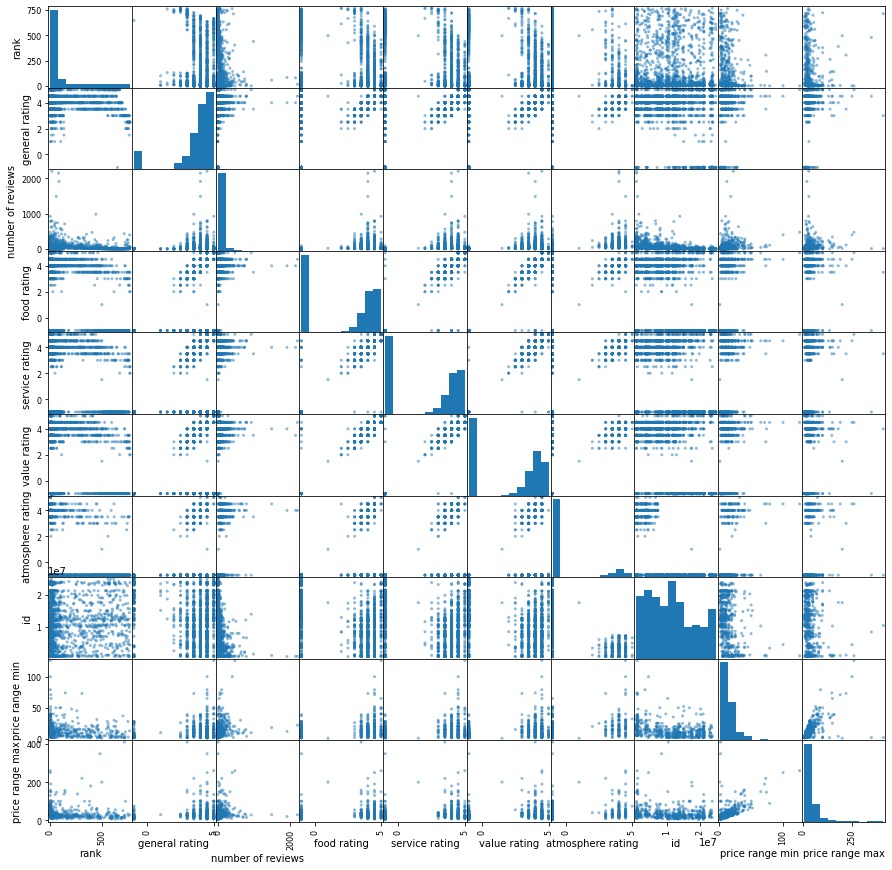

In [5]:
# visualize the histogram and scatter plot of the data
pd.plotting.scatter_matrix(df, figsize=[15,15])

Two problems can be spotted from the visualization.
1. Some of the data are not stored as numeric, e.g. general rating. <br> Find out why and how to numericize them.
2. Some columns contains *-1* in the histogram, what does it mean and what should you do?

In [6]:
# Check the each column and try to numericize rank, general rating, number of reviews
# rank
# al gedaan in vorige stap
df["rank"] = df["rank"]

# general rating
df["general rating"] = df["general rating"]

# number of reviews
df["number of reviews"] = df["number of reviews"]

While some of the columns can easily be numericized, some columns need more processing. One example is the price range.
* Task: Check the data formation and numericize the price range

In [7]:
# price range
print('-'*20, "price range", '-'*20)
print(df_train["price range"])

-------------------- price range --------------------
1119      12-32
277     nan-nan
2025    nan-nan
1267       4-25
573     nan-nan
         ...   
2041    nan-nan
1531    nan-nan
1428      15-22
117     nan-nan
1525    nan-nan
Name: price range, Length: 2064, dtype: object


As it can be seen, the price range column contains the lower bound and upper bound of the price.
Also that some of the price are not available.
* Task: How are you going to numericize the price range?

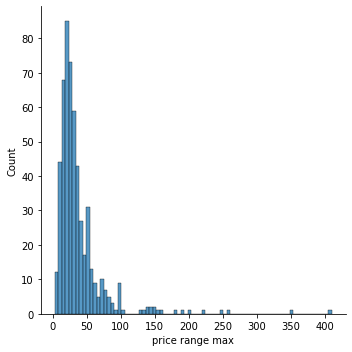

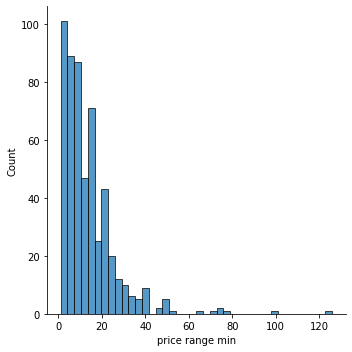

In [8]:
# Get the upper and lower bound of the price range and visualize the results
upper_bound = df_train["price range max"]

lower_bound = df_train["price range min"]

sn.displot(upper_bound)
sn.displot(lower_bound)

The price ranges variously. Considering the fact that there are not so much data avaiable, another way of processing the data is with discretization.
* Task: Dscretization the data

1119      1
277     NaN
2025    NaN
1267      2
573     NaN
       ... 
2041    NaN
1531    NaN
1428      1
117     NaN
1525    NaN
Name: average_quantized, Length: 2064, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


,rank,general rating,number of reviews,food rating,service rating,value rating,atmosphere rating,id,price range min,price range max,average_quantized,price range
1119,2.0,4.0,17.0,-1.0,-1.0,-1.0,-1.0,17473675,12.0,32.0,1,1
277,2.0,4.5,69.0,4.5,4.0,4.0,-1.0,7233853,NaN,NaN,NaN,NaN
2025,29.0,4.0,1.0,-1.0,-1.0,-1.0,-1.0,23777561,NaN,NaN,NaN,NaN
1267,477.0,4.0,21.0,4.0,4.0,3.5,-1.0,10539654,4.0,25.0,2,2
573,2.0,4.5,22.0,5.0,4.5,4.5,-1.0,19323310,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,662.0,5.0,1.0,-1.0,-1.0,-1.0,-1.0,12233182,NaN,NaN,NaN,NaN
1531,2.0,3.5,19.0,3.0,3.5,3.5,-1.0,10631925,NaN,NaN,NaN,NaN
1428,22.0,5.0,3.0,-1.0,-1.0,-1.0,-1.0,22981952,15.0,22.0,1,1
117,70.0,4.0,267.0,4.0,4.0,4.0,4.0,1537371,NaN,NaN,NaN,NaN


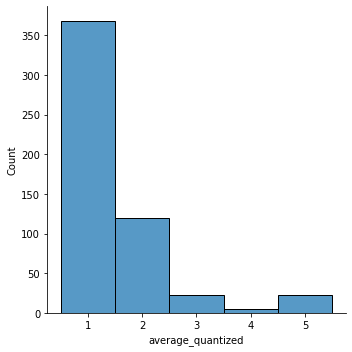

In [9]:
# You can quantify them by taking the mean of the price range or take the upper and lower bound

average = (upper_bound-lower_bound)/2



df['average_quantized'] =  pd.cut(average,bins=[0, 10, 20, 30, 40, np.inf],labels=[1, 2, 3, 4, 5])


# discretization using pandas cut
# you can also try use sklearn
from sklearn import preprocessing
# transformer = ...
avg_quantfied = df['average_quantized']

#show the bin range
print(avg_quantfied)

#visualize the data
sn.displot(avg_quantfied)

df['price range'] = df['average_quantized']
df

Now draw the visualize the numeric data again to see if there's anything else to fix.

array([[<AxesSubplot:xlabel='rank', ylabel='rank'>,
        <AxesSubplot:xlabel='general rating', ylabel='rank'>,
        <AxesSubplot:xlabel='number of reviews', ylabel='rank'>,
        <AxesSubplot:xlabel='food rating', ylabel='rank'>,
        <AxesSubplot:xlabel='service rating', ylabel='rank'>,
        <AxesSubplot:xlabel='value rating', ylabel='rank'>,
        <AxesSubplot:xlabel='atmosphere rating', ylabel='rank'>,
        <AxesSubplot:xlabel='id', ylabel='rank'>,
        <AxesSubplot:xlabel='price range min', ylabel='rank'>,
        <AxesSubplot:xlabel='price range max', ylabel='rank'>],
       [<AxesSubplot:xlabel='rank', ylabel='general rating'>,
        <AxesSubplot:xlabel='general rating', ylabel='general rating'>,
        <AxesSubplot:xlabel='number of reviews', ylabel='general rating'>,
        <AxesSubplot:xlabel='food rating', ylabel='general rating'>,
        <AxesSubplot:xlabel='service rating', ylabel='general rating'>,
        <AxesSubplot:xlabel='value rating', ylab

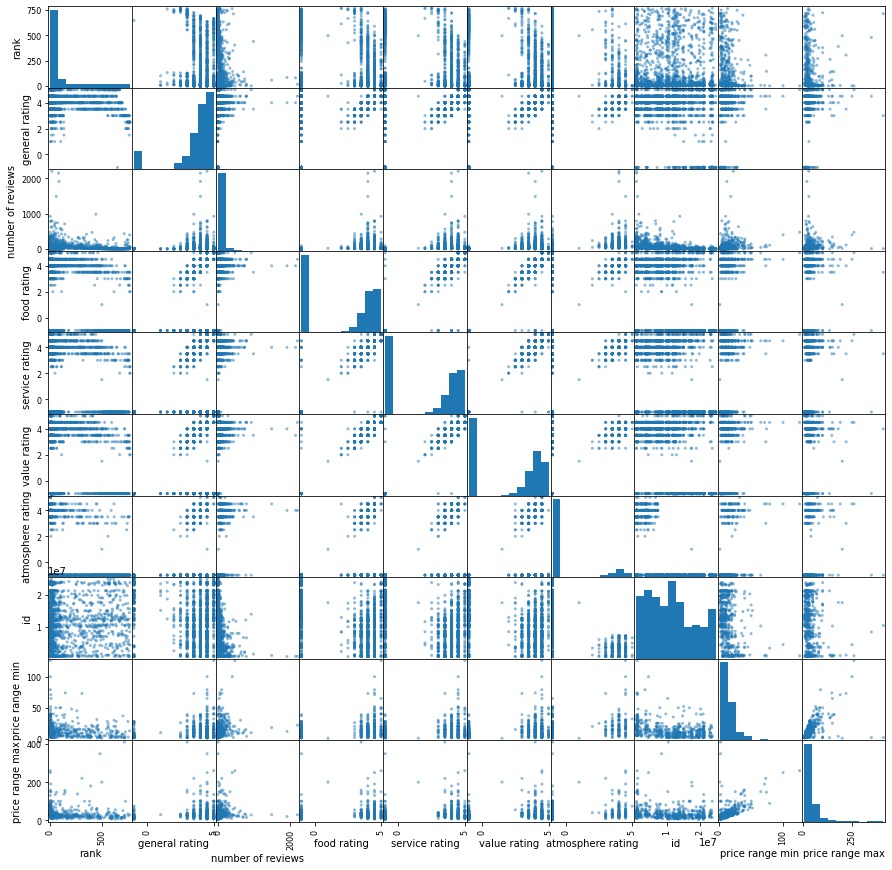

In [10]:
pd.plotting.scatter_matrix(df,figsize=[15,15])

The second quesion: Some columns contains -1 in the histogram, for some cases it stands for missing values. <br>
As mentioned in the lecture, some possible solutions are, droping the entries or attribute, or imputation.
* Under what condition should you drop the entries?
* Under what condition should you drop the attributes?
* How can you imputation the missing value, how will it affects the data and further analysis?

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [12]:
# Visualise the data after dropping the entries
# welke bevatten -1 in histogram?

# housing.dropna(subset=["total_bedrooms"])    # option 1
# housing.drop("total_bedrooms", axis=1)       # option 2
# median = housing["total_bedrooms"].median()  # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)



df = df.replace(-1,np.nan)


df_dropped = df.drop(columns=['price range','id','price range min','price range max','average_quantized'])
imputer.fit(df_dropped)
imputer.statistics_




array([23.,  4., 18.,  4.,  4.,  4.,  4.])

In [13]:
X = imputer.transform(df_dropped)
X_pandas = pd.DataFrame(X, columns=df_dropped.columns, index=df.index)
X_pandas['price range'] = df['price range']
X_pandas['price range min'] = df['price range min']
X_pandas['price range max'] = df['price range max']
X_pandas

,rank,general rating,number of reviews,food rating,service rating,value rating,atmosphere rating,price range,price range min,price range max
1119,2.0,4.0,17.0,4.0,4.0,4.0,4.0,1,12.0,32.0
277,2.0,4.5,69.0,4.5,4.0,4.0,4.0,NaN,NaN,NaN
2025,29.0,4.0,1.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
1267,477.0,4.0,21.0,4.0,4.0,3.5,4.0,2,4.0,25.0
573,2.0,4.5,22.0,5.0,4.5,4.5,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2041,662.0,5.0,1.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
1531,2.0,3.5,19.0,3.0,3.5,3.5,4.0,NaN,NaN,NaN
1428,22.0,5.0,3.0,4.0,4.0,4.0,4.0,1,15.0,22.0
117,70.0,4.0,267.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


Non-numeric columns may also contain rich information. <br>
These data can be encoded using different techniques, e.g. one-hot encoding, ordinal encoding. <br>
Take a look at the data, what types of data are suitable for ordinal encoding? What suits one-hot encoding more?
* Task: Encode data with these different coding method and then explain your choice.

In [14]:
# ordinal encoding

# df['city'] = df_train['address'].str.split(' ').str[-3]

df['city'] = df_train["address"].str.split(', ').str[-1].str.split(" ").str[0]
df['city']

1119    Sint-Gillis-Waas
277             Zottegem
2025               Hamme
1267               Ghent
573            Erpe-Mere
              ...       
2041               Ghent
1531             Berlare
1428            Zottegem
117                Ghent
1525            Zottegem
Name: city, Length: 2064, dtype: object

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

[array(['Aaigem', 'Aalst', 'Aalter', 'Adegem', 'Afsnee', 'Assenede',
       'Astene', 'Baarle', 'Bachte-Maria-Leerne', 'Balegem', 'Bazel',
       'Bellem', 'Belsele', 'Berchem', 'Berlare', 'Bevere', 'Beveren',
       'Boekhoute', 'Bottelare', 'Brakel', 'Buggenhout', 'De', 'Deinze',
       'Denderhoutem', 'Denderleeuw', 'Dendermonde', 'Destelbergen',
       'Deurle', 'Dikkelvenne', 'Dries', 'Drongen', 'Edelare', 'Eeklo',
       'Eke', 'Elene', 'Elsegem', 'Erembodegem', 'Erondegem', 'Erpe',
       'Erpe-Mere', 'Ertvelde', 'Evergem', 'Gavere', 'Geraardsbergen',
       'Ghent', 'Gijzegem', 'Grammene', 'Grotenberge', 'Haaltert',
       'Haasdonk', 'Hamme', 'Herzele', 'Heusden', 'Hofstade', 'Hoorebeke',
       'Horebeke', 'Huise', 'Kalken', 'Kallo', 'Kaprijke', 'Kemzeke',
       'Kieldrecht', 'Kluisbergen-Ruien', 'Knesselare', 'Kruibeke',
       'Kruisem', 'Kruishoutem', 'Kwaremont', 'Laarne', 'Lebbeke', 'Lede',
       'Ledeberg', 'Lembeke', 'Lierde', 'Lievegem', 'Lochristi',
       'Lokeren

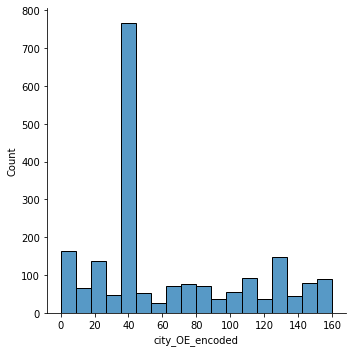

In [16]:

# use skleanr for perform ordinal encoding and check the categories

df['city_OE_encoded'] = ordinal_encoder.fit_transform(df[['city']])
print(ordinal_encoder.categories_)

# also visualize the results
sn.displot(df['city_OE_encoded'])


In [17]:
# one hot encoding uitproberen
from sklearn.preprocessing import OneHotEncoder

oneHot_encoder = OneHotEncoder()


x = oneHot_encoder.fit_transform(df[['city']])

OHE = x.todense()
OHE


# df['test']

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Correlations
Since you've already pre-processed quite some data, now you can easily look at the correlations between these features.
This can easily be done using seaborn (https://seaborn.pydata.org/).
* Try to show the correlation and draw a heatmap of the correlations.
* Think of the features that might correlates, look inside them and see if that's the case.

general rating       1.000000
food rating          0.795536
value rating         0.765478
service rating       0.764682
atmosphere rating    0.551913
id                   0.209854
price range min      0.052581
city_OE_encoded      0.011889
number of reviews   -0.006727
price range max     -0.013781
rank                -0.130297
Name: general rating, dtype: float64


<AxesSubplot:>

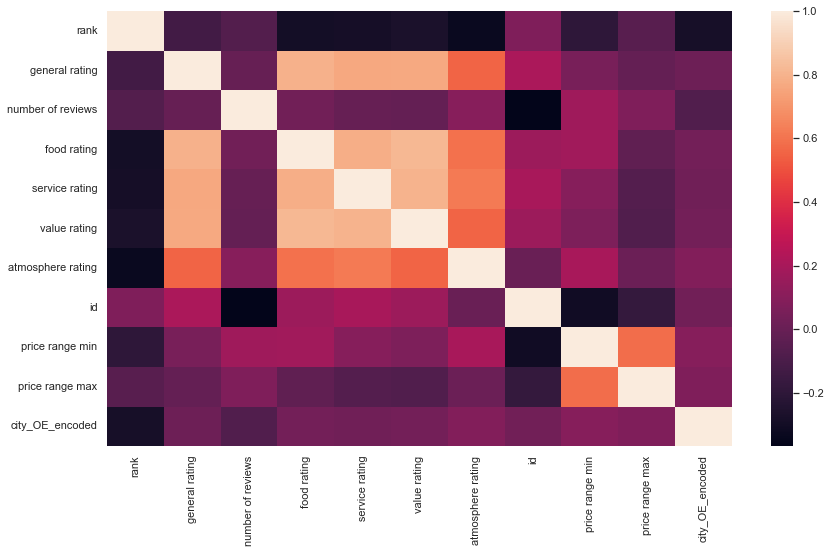

In [18]:
# Visualize the result for better interpretion 
# Hint: seaborn,  matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Try to get the correlation against general rating
corr = df.corr()
print(corr["general rating"].sort_values(ascending=False))

# Show the correlation as heat map to see the difference
plt.figure(figsize=(14,8))
sns.set_theme(style="white")

heatmap = sns.heatmap(corr)
heatmap

Now that you have learnt most of the techniques of preprocessing data. <br>
Look into the rest of the dataset and think about how are you going to use these features to apply on your project.
* You can try to find the correlations between features and see if you can get some ideas from it.
* You can try to extract more features from tags or descriptions, and see decide how to encode them (onehot/ordinal).
* You can also try to use the pipline function of the scikit-learn (https://scikit-learn.org/stable/modules/compose.html#) to apply the previous techniques on other datasets, such as the testing set.

## Remarks
- We now get the initial idea about the data that we will used for the project.
- We should also learn the preprocessing, including how to turn these data into the form that we can easily use.
- While doing the preprocess, we also have a better idea of the distribution of the data, also the outliers. 
- We further learn the ways to deal with the missing data. Try think about the ways to fix missing data for different tasks?
- After the exploration, does the data fit your expectation about the project? Have you change your mind about the task you will develop in the project? 

## Feature extraction: Working with textual data

In the ideal scenario, data is available to you in tabular format. The rows represent individual datapoints and there is a column for each feature. This makes it easy for us to use it directly as input to a machine learning model that expects a matrix as input.

For many real world problems, you will need to first define and extract these features manually. In this exercise we will investigate how this can be done for textual data. Text data is a type of **unstructured data** since there is no predefined format for it. 

When working with textual data, you need to perform two steps prior to training an ML model **Data preprocessing** and **feature extraction**.

The preprocessing can include:
- **Tokenization**: converting sentences to words
- Removing unnecessary punctuation
- Removing urls, html markup, ...
- Removing **stop words**, frequent words such as "the", "is", "a", etc. that do not have specific semantic
- **Stemming**: words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
- **Lemmatization**: Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.

The result of the preprocessing step is a list of words. We can use different approaches to extract features from these words to obtain numerical representations that we can give to machine learning models. The goal of this feature extraction step is to take a **document** (a collection of words) and to transform it into a numerical feature vector. The documents will vary in size but the feature vector usually has a fixed size. The collection of all documents is often called the **corpus** in text processing. We often use statistics of the corpus to obtain a feature representation for a single document.
- **Bag of Words (BOW)**: This is the simplest possible representation: We make the list of all the unique words in the text corpus, this is called the **vocabulary**. Then we can represent each document as a vector that indicates how many times each word from the vocabulary occurs in the document. This is a very simple method but can be useful in certain applications. In SPAM detection, we can expect that the words "stock", "Viagra", and "buy" can be indicative of SPAM emails. 
- A disadvantage is that this technique is only concerned with the occurrence of the word and not with the order of the words. It also treats each word independently.  You can solve this by introducing **n-gram generation** in the preprocessing step. n-grams are created by extracting all sequential n words from the document. **Bi-grams** for example extract all sequential pairs. The sentence "The president of the US is Joe Biden" will be transformed into \["The president", "president of", "of the", "the US", "US is", "is Joe", "Joe Biden"]. This is useful to capture terms consisting of multiple words. Bi-grams allow you to recognize both "Donald Trump" and "Donald Duck". Alternatively, you can also extract **tri-grams** (n=3).
- **TF-IDF**: shorthand for **term frequency-inverse document frequency**. Is a way of normalizing the BOW approach. It is the **term frequency** divided by the **document frequency**. Instead of just counting how many times a certain word occurs in the document (the term frequency) we divide it by the document frequency (the number of documents this word occurs in). A word that occurs often in a certain document but does not occur often in other documents is probably an important word for this document. 
- **Word embeddings**: Are the most advanced technique. A word embedding method transforms a word into a point in a high dimensional space where words that have a similar meaning are mapped to similar points. Word embeddings can be seen as a form of dimensionality reduction. This allows us to learn more complex relationships. The most common Word embedding technique is **Word2Vec**. It makes the assumption that two words that occur at a similar position in different sentences have more or less the same meaning. If you have the two sentences "BMW is a German car manufacturer" and "Tesla is an American automobile manufacturer", you can infer that "BMW" and "Tesla", "German" and "American" and "car" and "automobile" are related. Word embeddings are trained on a large text corpus such as wikipedia. You can find more information at https://pathmind.com/wiki/word2vec#import

## The data: Reviews from Tripadvisor
In the following exercise we will use TF-IDF to extract features from "Reviews from Tripadvisor". This is collected from the tripadvisor dataset, consisting the reviews for different restaurants. <br>
This could be the complementary of the "Tripadvisor Top Restaurants" dataset. 

*Hint: While you are learning the techniques, think about how the extracted data can be used for the project.*

Note: if some processing steps are very slow, it can help to temporarily experiment on a subset of the documents.

In [19]:
import pandas as pd

In [98]:
df = pd.read_csv("tripadvisor_dataset/reviews.csv")#.head(5000)
print("Number of reviews in dataset: ",df.shape[0])
print(df.head(10))
df

Number of reviews in dataset:  136173
         id      reviewer name  \
0  13969825           bertd818   
1  13969825       593laetitiad   
2  13969825           612ellen   
3  13969825             j0ycal   
4  13969825  Global45882037169   
5  13969825        672lindsayv   
6  13969825          Raphael V   
7  13969825           MikeBhdt   
8  13969825            truwant   
9  13969825             SVerst   

                                               title                date  \
0                     supper snelle en lekkere lunch  September 26, 2022   
1     Un délicieux repas aux saveurs de la Thaïlande  September 24, 2022   
2                      Altijd leuk om terug te komen  September 19, 2022   
3  Perfect onthaal/gastvrijheid, superlekker eten...  September 19, 2022   
4                                           genieten  September 19, 2022   
5                                 Vrijgezellen diner  September 18, 2022   
6                                   Super restaurant  S

,id,reviewer name,title,date,rating,review
0,13969825,bertd818,supper snelle en lekkere lunch,"September 26, 2022",5.0,"supper lekker gegeten tijdens de middag, als w..."
1,13969825,593laetitiad,Un délicieux repas aux saveurs de la Thaïlande,"September 24, 2022",5.0,Un menu lunch très bien équilibré aux niveaux ...
2,13969825,612ellen,Altijd leuk om terug te komen,"September 19, 2022",5.0,Super gezellig restaurant met super bediening ...
3,13969825,j0ycal,"Perfect onthaal/gastvrijheid, superlekker eten...","September 19, 2022",5.0,"Perfect onthaal, lekker eten. Heel goede lunch..."
4,13969825,Global45882037169,genieten,"September 19, 2022",5.0,"verrassend lekker gegeten, een mooi en rustig ..."
...,...,...,...,...,...,...
136168,1199541,Geertlieve,Onbeschofte baas,"September 8, 2012",1.0,"Vanavond eens iets gezellig gaan eten, dit was..."
136169,1199541,frans g,Slechtste ervaring ooit!,"June 1, 2012",1.0,Wenst u uiterst onvriendelijk te worden behand...
136170,1199541,fideba,To be avoided at all times,"July 26, 2011",1.0,"This restaurant is a joke. Service was fast, b..."
136171,1199541,Jan D,"fast, friendly and very good food","November 4, 2009",5.0,"The Graaf van Egmo,t is in my opinion one of t..."


<font color='red'>Task: Follow the instructions at https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html to preprocess the data and to extract TF-IDF features. Experiment with different ngrams and the *min_df* and *max_df* parameters. These last two parameters allow you to remove terms that are present in only a few documents or in most of the documents.</font>

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# elke review is een document

# ngram_range = (2,2) => alleen bigrams
# https://kavita-ganesan.com/how-to-use-countvectorizer/#.Y0AUbnbP3l0
# https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
# # this steps generates word counts for the words in your docs (.vocabulary_ gebruiken)

df["both"] = df["review"] + df["title"]

count_vect = CountVectorizer(ngram_range = (2,2), max_df=0.8)
df = df.dropna()
X_train_counts = count_vect.fit_transform(df["both"])


In [107]:
tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)



<font color='red'>Task: How many features are extracted ? </font>

In [108]:
feature_names=count_vect.get_feature_names_out()
print(feature_names[:10])

print(len(feature_names))
print(X_train_tf.shape)

['00 00' '00 00h' '00 05u' '00 10u' '00 12' '00 13' '00 14' '00 15'
 '00 16' '00 18']
1881553
(136166, 1881553)


In [109]:
count_vect.vocabulary_

{'supper lekker': 1482719,
 'lekker gegeten': 919972,
 'gegeten tijdens': 620986,
 'tijdens de': 1545218,
 'de middag': 358271,
 'middag als': 1017134,
 'als we': 74821,
 'we opnieuw': 1747097,
 'opnieuw in': 1158999,
 'in de': 789855,
 'de buurt': 350385,
 'buurt zijn': 249022,
 'zijn proberen': 1824935,
 'proberen we': 1270024,
 'we zeker': 1748368,
 'zeker op': 1815497,
 'op tijd': 1152455,
 'tijd te': 1544823,
 'te reserveren': 1505525,
 'reserveren voor': 1318225,
 'voor een': 1694383,
 'een avondmenu': 450531,
 'avondmenu supper': 133645,
 'supper snelle': 1482732,
 'snelle en': 1419587,
 'en lekkere': 488131,
 'lekkere lunch': 923204,
 'un menu': 1606039,
 'menu lunch': 1002122,
 'lunch très': 956011,
 'très bien': 1584670,
 'bien équilibré': 194884,
 'équilibré aux': 1845573,
 'aux niveaux': 129665,
 'niveaux saveurs': 1084718,
 'saveurs et': 1364766,
 'et quantités': 523081,
 'quantités service': 1286594,
 'service impeccable': 1387461,
 'impeccable un': 787212,
 'un endroit':

<font color='red'>Task: Look at the first review, what keywords are extracted and what is their tf-idf score ? </font>

In [112]:
print(df.at[0, "review"])
features = X_train_tf[0]

terms = pd.DataFrame(features.T.todense(), index=feature_names, columns=["tfidf"])
terms.sort_values(by=["tfidf"],ascending=False).head(n=10)

supper lekker gegeten tijdens de middag, als we opnieuw in de buurt zijn proberen we zeker op tijd te reserveren voor een avondmenu!


,tfidf
avondmenu supper,0.287910
supper snelle,0.287910
zijn proberen,0.271456
een avondmenu,0.266159
middag als,0.249705
opnieuw in,0.226127
supper lekker,0.222093
gegeten tijdens,0.216796
tijd te,0.207171
proberen we,0.206779


## Remarks
- We extracted the features from the text and used them to find similar reviews. In real applications you will use these features as input to a machine learning model for classification, clustering, regression, ...
- Since text documents are characterized by a large amount of features, it might be interesting to apply dimensionality reduction first. (see later theory lectures)
- TF-IDF and similar techniques are commonly used in search engines. For every document (webpage, product, ...). A TF-IDF vector is extracted that describes the content. All these vectors are stored in an **inverted index** that maps terms to documents. When the user executes a query, we just have to return the documents where a certain search term was found to be important.
- TF-IDF looks at words or pairs of words, this of course means that it depends on the language the text is written in. Be considate of this when having documents in multiple languages. Investigate how  you can handle this situation?
- TF-IDF is very commonly used but recently there has been much interest in **vector embedding** techniques such as word2vec, doc2vec, GloVe or fasttext. These models learn an **embedding space**. A lower dimensional space that words can be mapped to. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space. This has proven to be a very useful way to extract features from text.

# References

* Géron A., "Hands-on Machine Learnign with Scikit-Learn and Tensorflow. 2nd edition.
    